In [1]:
using ITensors
using Plots 

In [2]:
function GN_Stgg(N::Integer, f::Integer,m₀::Float64,G²::Float64,sw::Integer)
    L = f*N;
    l = L-2;
    BD = 2^N;
    sites = siteinds("Fermion",L)
    ampoₗ = OpSum()
    ampoₛ = OpSum()
    # H_0
    for j in 1:(L-f)
        ampoₗ -= 1im,"C",j,"Cdag",j+f
        ampoₗ += 1im,"C",j+f,"Cdag",j
    end
    # H_g
    for j in 1:f:L-f
        for a in 0:f-1
            for b in a+1:f-1
                ampoₗ += g²/2,"Cdag*C",j+a,"Cdag*C",j+b
            end
        end
    end

    for j in 1:f:(L-f)
        ampoₗ += G²/2.0,"C*Cdag",j,"C*Cdag",j+f
    end
    # H_m
    for j in 1:(L)
        ampoₗ += m₀*(-1)^j,"C*Cdag",j
    end
    ###########################################################
    # smaller lattice
     # H_0
    for j in 1:(l-f)
        ampoₛ -= 1im,"C",j,"Cdag",j+f
        ampoₛ += 1im,"C",j+f,"Cdag",j
    end
    # H_g
    for j in 1:f:L-f
        for a in 0:f-1
            for b in a+1:f-1
                ampoₛ += g²/2,"Cdag*C",j+a,"Cdag*C",j+b
            end
        end
    end
#     for j in 1:f:(l-f)
#         ampoₛ += G²/2.0,"C*Cdag",j,"C*Cdag",j+f
#     end
    # H_m
    for j in 1:(l)
        ampoₛ += m₀*(-1)^j,"C*Cdag",j
    end

    ψ₀ₗ = randomMPS(sites,BD);
    ψ₀ₛ = randomMPS(sites[1:l],BD)
    Hₗ = MPO(ampoₗ,sites);
    Hₛ = MPO(ampoₛ,sites[1:l])
    sweep = Sweeps(sw)
    setmaxdim!(sweep,repeat([500],sw)...)
    setcutoff!(sweep,1E-15)
    eₗ, ψₗ = dmrg(Hₗ,ψ₀ₗ,sweep)
    eₛ, ψₛ = dmrg(Hₛ,ψ₀ₛ,sweep)
    
    t1 = ITensor(sites[L-1:L])
    for j in 1:4
        t1[j] = 1.0/2.0
    end
    v = ITensor(1.0)
    for j in 1:L
        if j <= l
            v = v*dag(ψₗ[j])*ψₛ[j]
        else
            v = v*dag(ψₗ[j])*t1[L-j+1]
        end
    end
    return inner(v,v) , norm(v)
end

GN_Stgg (generic function with 1 method)

In [3]:
# GN_Stgg(N::Integer, f::Integer,m::Float64,G²::Float64,sw::Integer)
GN_Stgg(3,1,0.4,1.0,5)

After sweep 1 energy=-3.515730217448 maxlinkdim=8 maxerr=0.00E+00 time=32.053
After sweep 2 energy=-3.518597909122 maxlinkdim=8 maxerr=0.00E+00 time=0.022
After sweep 3 energy=-3.518598089776 maxlinkdim=8 maxerr=0.00E+00 time=0.008
After sweep 4 energy=-3.518598089783 maxlinkdim=8 maxerr=0.00E+00 time=0.008
After sweep 5 energy=-3.518598089783 maxlinkdim=8 maxerr=0.00E+00 time=0.008
After sweep 1 energy=-2.284873333227 maxlinkdim=4 maxerr=0.00E+00 time=0.006
After sweep 2 energy=-2.284887603399 maxlinkdim=4 maxerr=0.00E+00 time=0.005
After sweep 3 energy=-2.284887603668 maxlinkdim=4 maxerr=0.00E+00 time=0.005
After sweep 4 energy=-2.284887603668 maxlinkdim=4 maxerr=0.00E+00 time=0.006
After sweep 5 energy=-2.284887603668 maxlinkdim=4 maxerr=0.00E+00 time=0.007


(0.05613101291670142 + 0.0im, 0.23691984491954535)

In [36]:
inner_S_F = Vector{ComplexF64}()
norm_S_F = Vector{Float64}()

for j in 2:12  # 2:15 not available
    println("j = $j ")
    n1,n2 = GN_Stgg(j,1,0.2,1.5,5)
    push!(inner_S_F,n1)
    push!(norm_S_F,n2)
end

j = 2 
After sweep 1 energy=-2.098075074181 maxlinkdim=4 maxerr=0.00E+00 time=0.004
After sweep 2 energy=-2.098133648714 maxlinkdim=4 maxerr=0.00E+00 time=0.005
After sweep 3 energy=-2.098133657189 maxlinkdim=4 maxerr=0.00E+00 time=0.005
After sweep 4 energy=-2.098133657191 maxlinkdim=4 maxerr=0.00E+00 time=0.006
After sweep 5 energy=-2.098133657191 maxlinkdim=4 maxerr=0.00E+00 time=0.005
After sweep 1 energy=-1.019777410289 maxlinkdim=2 maxerr=0.00E+00 time=0.001
After sweep 2 energy=-1.019803902644 maxlinkdim=2 maxerr=0.00E+00 time=0.002
After sweep 3 energy=-1.019803902719 maxlinkdim=2 maxerr=0.00E+00 time=0.002
After sweep 4 energy=-1.019803902719 maxlinkdim=2 maxerr=0.00E+00 time=0.002
After sweep 5 energy=-1.019803902719 maxlinkdim=2 maxerr=0.00E+00 time=0.002
j = 3 
After sweep 1 energy=-3.125398565944 maxlinkdim=8 maxerr=0.00E+00 time=0.010
After sweep 2 energy=-3.190746031266 maxlinkdim=8 maxerr=0.00E+00 time=0.007
After sweep 3 energy=-3.191287961914 maxlinkdim=8 maxerr=0.00E

LoadError: InterruptException:

In [3]:
# x1 = [x for x in 2:10];
# y1 = [y for y in norm_S_F];
x2 = [x for x in 2:10];
y2 = [y for y in norm_S_F];

LoadError: UndefVarError: norm_S_F not defined

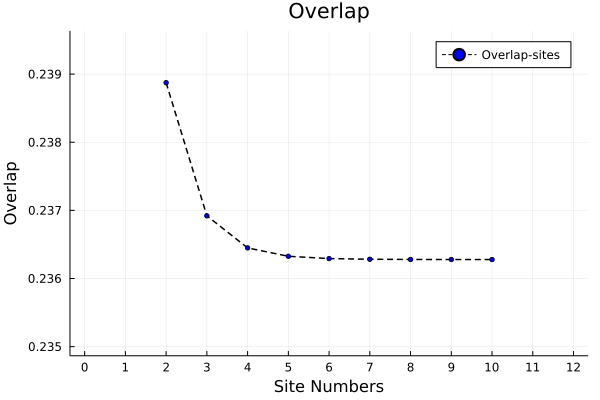

In [17]:
plot(x1,y1,linestyle=:dash ,title="Overlap",marker = :circle,
        markersize = 2.5, markercolor=:blue,
        xlim=[0,12],ylim=[0.235,0.2395],linecolor=:black,
        label = ["Overlap-sites" "Line 2"],xlabel="Site Numbers",
        ylabel="Overlap",yticks=0.235:0.001:0.240,xticks=0:1:12,lw=1.5)

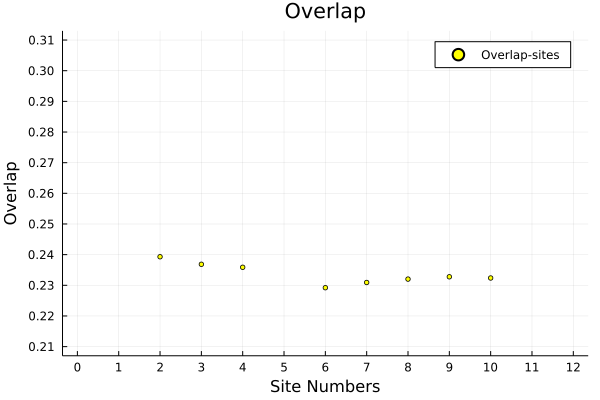

In [31]:
scatter(x2,y2,linestyle=:dash ,title="Overlap",marker = :circle,
        markersize = 2.5, markercolor=:yellow,
        xlim=[0,12],ylim=[0.21,0.31],linecolor=:black,
        label = ["Overlap-sites" "Line 2"],xlabel="Site Numbers",
        ylabel="Overlap",yticks=0.21:0.01:0.31,xticks=0:1:12,lw=1.5)

## Part 2

In [1]:
using ITensors 
using Plots

In [ ]:
function GN_Stgg(N::Integer, f::Integer,m₀::Float64,G²::Float64,sw::Integer)
    L = f*N;
    l = L-2f;
    BD = 2^(Nf);
    sites = siteinds("Fermion",L)
    ampoₗ = OpSum()
    ampoₛ = OpSum()
    # H_0
    for j in 1:(L-f)
        ampoₗ -= 1im,"C",j,"Cdag",j+f
        ampoₗ += 1im,"C",j+f,"Cdag",j
    end
    # H_g
    for j in 1:f:L-f
        for a in 0:f-1
            for b in a+1:f-1
                ampoₗ += g²/2,"Cdag*C",j+a,"Cdag*C",j+b
            end
        end
    end

#     for j in 1:f:(L-f)
#         ampoₗ += G²/2.0,"C*Cdag",j,"C*Cdag",j+f
#     end
    # H_m
    for j in 1:(L)
        ampoₗ += m₀*(-1)^j,"C*Cdag",j
    end
    ###########################################################
    # smaller lattice
     # H_0
    for j in 1:(l-f)
        ampoₛ -= 1im,"C",j,"Cdag",j+f
        ampoₛ += 1im,"C",j+f,"Cdag",j
    end
    # H_g
    for j in 1:f:L-f
        for a in 0:f-1
            for b in a+1:f-1
                ampoₛ += g²/2,"Cdag*C",j+a,"Cdag*C",j+b
            end
        end
    end
#     for j in 1:f:(l-f)
#         ampoₛ += G²/2.0,"C*Cdag",j,"C*Cdag",j+f
#     end
    # H_m
    for j in 1:(l)
        ampoₛ += m₀*(-1)^j,"C*Cdag",j
    end

    ψ₀ₗ = randomMPS(sites,BD);
    ψ₀ₛ = randomMPS(sites[1:l],BD)
    Hₗ = MPO(ampoₗ,sites);
    Hₛ = MPO(ampoₛ,sites[1:l])
    sweep = Sweeps(sw)
    setmaxdim!(sweep,repeat([500],sw)...)
    setcutoff!(sweep,1E-15)
    eₗ, ψₗ = dmrg(Hₗ,ψ₀ₗ,sweep)
    eₛ, ψₛ = dmrg(Hₛ,ψ₀ₛ,sweep)
    
    t1 = ITensor(sites[L-1:L])
    for j in 1:4
        t1[j] = 1.0/2.0
    end
    v = ITensor(1.0)
    for j in 1:L
        if j <= l
            v = v*dag(ψₗ[j])*ψₛ[j]
        else
            v = v*dag(ψₗ[j])*t1[L-j+1]
        end
    end
    return inner(v,v) , norm(v)
end

In [ ]:
#=
This is a simple implementation of equation 8 of(Quantum Simulation of the N flavor Gross-Neveu Model)
 https://arxiv.org/abs/2208.05906  
 In this code we put "a" (flavor counter) equal to one 
=#

using ITensors 
#=
Function params are 
L: number of lattice site 
m_0 : mass 
g_o : interaction coefficient 
=#
function oneFlavorGN(L,m_0,g_0)
    sites = siteinds("Fermion",L)
    ampo = OpSum()

    # Creation of Hamiltonian
    for j in 1:L-1
        ampo += 1im,"C",j,"Cdag",j+1
        ampo += -1im,"Cdag",j,"C",j+1
        ampo += -1im,"C",j+1,"Cdag",j
        ampo += 1im,"Cdag",j+1,"C",j
    end
    # Mass  and interaction terms of Hamiltonian
    for j in 1:L
        ampo += 2*m_0*(-1)^j,"Cdag",j,"C",j
        ampo += g_0/2,"N",j
    end

    # Creation of MPO
    H_1 = MPO(ampo,sites) 
    #Initial random MPS
    psi0 = randomMPS(sites,10)
    # Determine DMTG params
    sweep = Sweeps(3)
    setmaxdim!(sweep,repeat([10],3)...)
    setcutoff!(sweep,1E-10)
    # DMRG computation
    e0_1,psi0_1 = dmrg(H_1,psi0,sweep) ;
    return e0_1
end

print(oneFlavorGN(6,1,2))

In [ ]:
yerr = [0.00E+00, 9.99E-16, 3.62E-16, 6.53E-17, 2.51E-16 ]
x = [2,3,4,5,6];
y = [-1.000000000000, -1.905410513686,-3.102775049097, -3.844161713116, -4.896585238471 ];
savefig(plot(x,y,linestyle=:dash ,title="E-S",marker = :star5, markersize = 4, markercolor=:red,
    xlim=[2,6],ylim=[-5.0,-1],linecolor=:blue,label = ["E-S" "Line 2"],xlabel="Site Numbers",
        ylabel="Energy",yticks=-5:0.5:-1,
    lw=1.5),"one.png")

In [ ]:
using PlotlyJS
yerr = [0.00E+00, 9.99E-16, 3.62E-16, 6.53E-17, 2.51E-16 ]
x = [2,3,4,5,6];
y = [-1.000000000000, -1.905410513686,-3.102775049097, -3.844161713116, -4.896585238471 ];
scatter(x,y,grid=false,title="E-S",marker = :circle, markersize = 3, markercolor=:red,
    xlim=[2,6],ylim=[-5.0,-1],linecolor=:blue,label = ["E-S" "Line 2"],xlabel="Site Numbers",
    ylabel="Energy",yticks=-5:0.5:-1
   )

annotate!([2],[-1.25],text("-1.000", :green, 8))
annotate!([3],[-2.25],text("-1.905", :green, 8))
annotate!([4],[-3.30],text("-3.102", :green, 8))
annotate!([5],[-4.20],text("-3.844", :green, 8))
annotate!([6],[-5],text("-4.896", :green, 8))
#linestyle=:dash
# lw=1.5
# yerror=yerr.*10E10,ribbon=yerr.*10E10,fillalpha=.5
# savefig("two.png")
